<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Synthetic-datasets" data-toc-modified-id="Synthetic-datasets-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Synthetic datasets</a></span><ul class="toc-item"><li><span><a href="#sound-like-datasets" data-toc-modified-id="sound-like-datasets-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>sound-like datasets</a></span><ul class="toc-item"><li><span><a href="#Sine-with-noise" data-toc-modified-id="Sine-with-noise-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Sine with noise</a></span></li></ul></li><li><span><a href="#Sounds-with-clicks-outliers" data-toc-modified-id="Sounds-with-clicks-outliers-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Sounds with clicks outliers</a></span></li><li><span><a href="#Signal-generation" data-toc-modified-id="Signal-generation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Signal generation</a></span></li><li><span><a href="#Blobs-with-outliers-from-uniform-distribution" data-toc-modified-id="Blobs-with-outliers-from-uniform-distribution-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Blobs with outliers from uniform distribution</a></span></li><li><span><a href="#additional-material-from-forged" data-toc-modified-id="additional-material-from-forged-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>additional material from forged</a></span></li></ul></li></ul></div>

This notebook gathers various examples of available synthetic datasets:
   * sound-like datasets: 
        * sine wave, mix of sine waves, waveforms with clicks added to the signal
        * sine waves with noise (Gaussian)
    * signal generators:
        * blobs with outliers (coming from uniform distribution)
        * signal generated by sequences of symbols, and perturbed by outliers injected at given points
        
    

In [14]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Synthetic datasets

## sound-like datasets

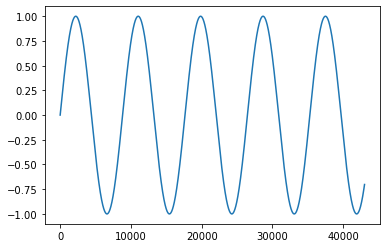

In [15]:
# github.com/otosense/hum
from hum.gen.sine_mix import mk_sine_wf, freq_based_stationary_wf

DFLT_N_SAMPLES = 21 * 2048
DFLT_SR = 44100
wf = mk_sine_wf(freq=5, n_samples=DFLT_N_SAMPLES, sr=DFLT_SR, phase=0, gain=1)
plt.plot(wf);

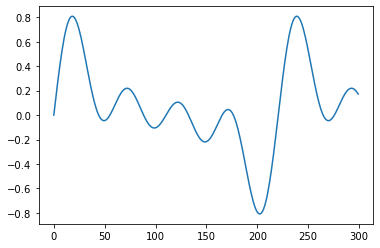

In [16]:
# mix of waves
wf_mix = freq_based_stationary_wf(freqs=(200, 400, 600, 800), weights=None,
                             n_samples = DFLT_N_SAMPLES, sr = DFLT_SR)
plt.plot(wf_mix[:300]);

### Sine with noise

In [12]:
# fastest generation of time series
import timesynth as ts
import pandas as pd
# Initializing TimeSampler
time_sampler = ts.TimeSampler(stop_time=20)
time_sampler_2 = ts.TimeSampler(stop_time=20)


# Sampling irregular time samples
irregular_time_samples_1 = time_sampler.sample_irregular_time(num_points=500, keep_percentage=50)
irregular_time_samples_2 = time_sampler_2.sample_irregular_time(num_points=500, keep_percentage=50)


# Initializing Sinusoidal signal
sinusoid_1 = ts.signals.Sinusoidal(frequency=0.25)
sinusoid_2 = ts.signals.Sinusoidal(frequency=0.5)
# Initializing Gaussian noise
white_noise_1 = ts.noise.GaussianNoise(std=0.3)
white_noise_2 = ts.noise.GaussianNoise(std=0.4)
# Initializing TimeSeries class with the signal and noise objects
timeseries_1 = ts.TimeSeries(sinusoid_1, noise_generator=white_noise_1)
timeseries_2 = ts.TimeSeries(sinusoid_2, noise_generator=white_noise_2)


# Sampling using the irregular time samples
samples_1, signals_1, errors_1 = timeseries_1.sample(irregular_time_samples_1)
samples_2, signals_2, errors_2 = timeseries_2.sample(irregular_time_samples_2)
df_ts = pd.DataFrame()
df_ts['ch_1']= samples_1
df_ts['ch_2']= samples_2



array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

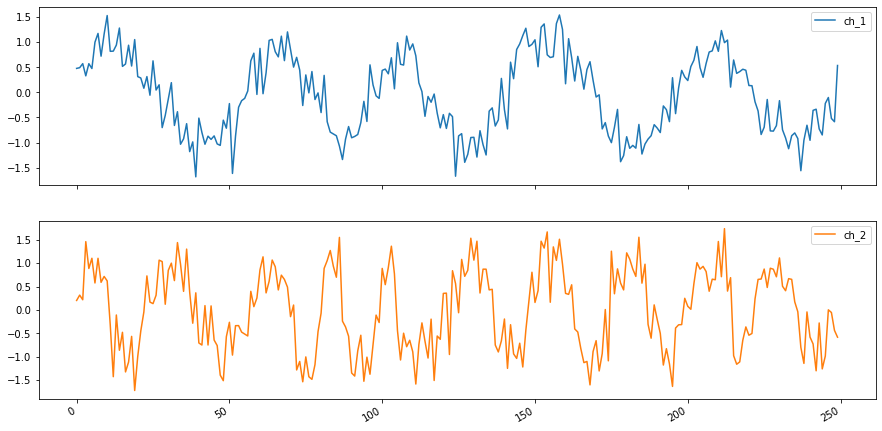

In [13]:
df_ts.plot(figsize=(15,8), subplots = True)

In [24]:
# for more: check WfGen, BinarySound, wf_with_timed_bleeps, etc...
from hum.gen.diagnosis_sounds import BinarySound

## Sounds with clicks outliers

In [1]:
from oscrap.sb import click_maker

In [2]:
from hum import disp_wf, plot_wf
from hear import WavSerializationTrans, WavLocalFileStore

my_wav_store = WavLocalFileStore('/Users/Sylvain/Dropbox/sipyb/Testing/data/ClickDetection') # base sound
click_template = my_wav_store['base_click.wav'] # sound to be added to the base sound
wf_base = my_wav_store['wf_base.wav']

/anaconda2/envs/otopy38/lib/python3.8/site-packages/hum/util.py:28: UserWarning: You'll need to pip install pyttsx3 to use voiced_time
  warn(msg)


In [5]:
# expand a short click to an arbitrary length by padding with zeroes
long_click = click_maker.pad_to_length(click_template, len(wf_base))

# place clicks at arbitrary timestamps
timestamps= [2000, 10000, 20000, 40000, 60000]
wf_with_clicks = click_maker.clickify(wf_base, timestamps, long_click, click_marker = None)

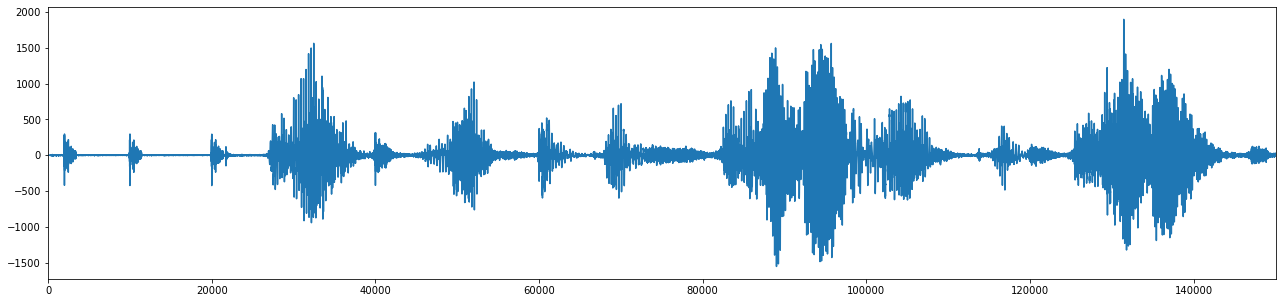

In [6]:
# view base sound + all added clicks
plot_wf(wf_with_clicks)

## Signal generation

In [15]:
from oscrap.sb.signal_generators import signal_gen as sgen # now in hum

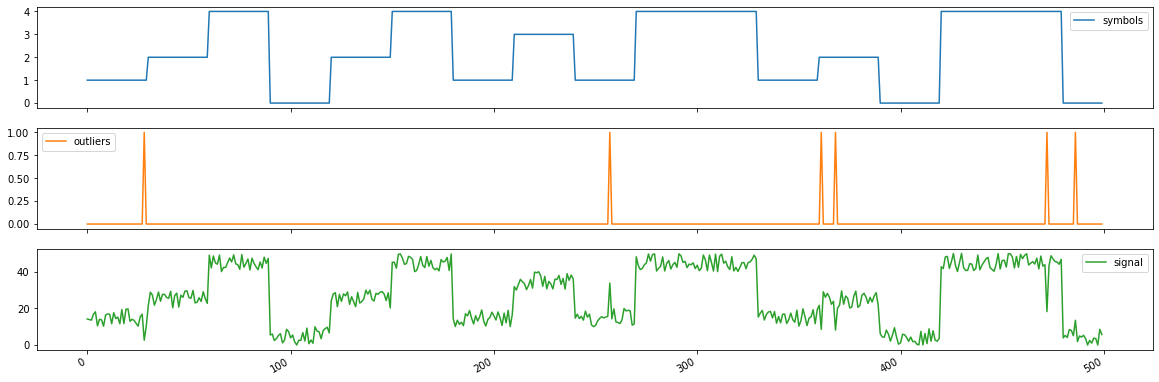

In [17]:
symb_res = sgen.categorical_gen(sgen.gen_words)
out_res = sgen.bernoulli_gen(p_out=0.01)
df = sgen.session_to_df(sgen.create_session(symb_res, out_res, alphabet=list('abcde'),session_length=500))
df.plot(subplots=True, figsize=(20,7));

## Blobs with outliers from uniform distribution

In [7]:
# taken from pyod
from pyod.utils.data import generate_data
contamination = 0.1  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points

X_train, y_train, X_test, y_test = generate_data(
    n_train=n_train, n_test=n_test, contamination=contamination)

/anaconda2/envs/otopy38/lib/python3.8/site-packages/pyod/utils/data.py:185: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  warn('behaviour="old" is deprecated and will be removed '


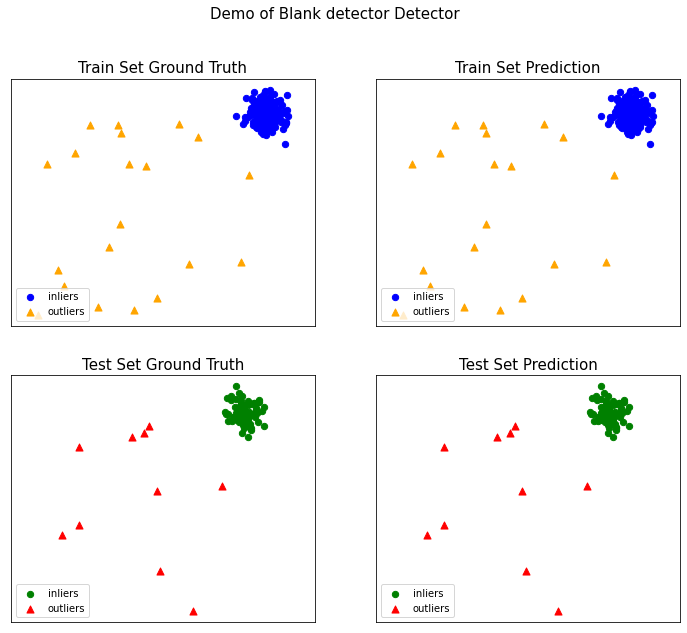

In [12]:
from pyod.utils.example import data_visualize
from pyod.utils.example import visualize
clf_name = "Blank detector"
#data_visualize(X_train, y_train, show_figure=True, save_figure=False)
visualize(clf_name, X_train, y_train, X_test, y_test, y_train,
          y_test, show_figure=True, save_figure=False)

## additional material from forged

In [ ]:
# check random_points_not_in_box, 
#  test_on_blobs: "randomly select data, fit a model, and assert a minimum accuracy"

In [ ]:
# Todo : add explanation above, and copy in hum and forged